<a href="https://colab.research.google.com/github/ovimasbul83/ovimasbul83/blob/main/CNNautoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_image(image, label):
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  
  noise_factor = 0.5
  factor = noise_factor * tf.random.normal(shape=image.shape)
  image_noisy = image + factor
  image_noisy = tf.clip_by_value(image_noisy, 0.0, 1.0)
 
  return image_noisy, image

In [3]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePT1QXA/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePT1QXA/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


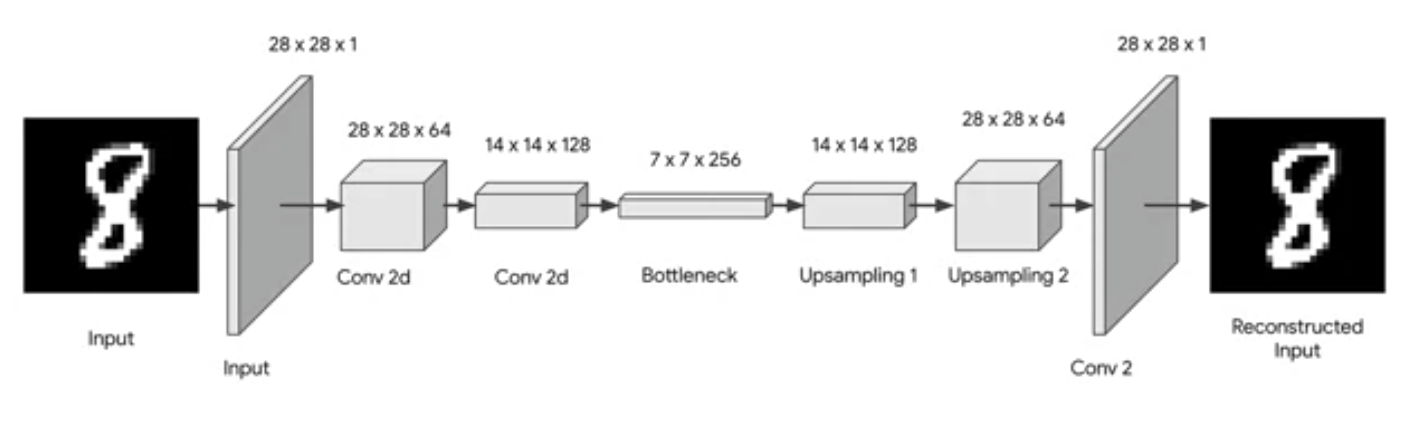

In [22]:
def encoder(inputs):
  conv_1=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same')(inputs)
  max_pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_1)
  conv_2=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same')(max_pool1)
  max_pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_2)
  return max_pool2

In [23]:
def bottle_neck(inputs):
  bottle_neck = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(inputs)
  encoder_visualization = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(bottle_neck)

  return bottle_neck, encoder_visualization


In [27]:
def decoder(inputs):
  conv_3=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(inputs)
  upsampling_1=tf.keras.layers.UpSampling2D(size=(2,2))(conv_3)
  conv_4=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(upsampling_1)
  upsampling_2=tf.keras.layers.UpSampling2D(size=(2,2))(conv_4)
  conv_5=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(upsampling_2)
  conv_6=tf.keras.layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(conv_5)
  return conv_6

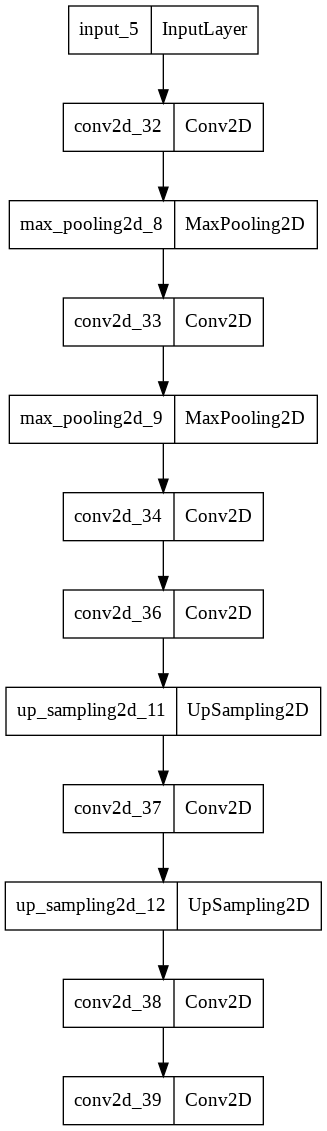

In [28]:
inputs=tf.keras.layers.Input(shape=(28,28,1))
encoder1=encoder(inputs)
bottle_neck1,encoder_viz1=bottle_neck(encoder1)
decoder1=decoder(bottle_neck1)
encoder_model1=tf.keras.Model(inputs=inputs,outputs=encoder_viz1)
decoder_model1=tf.keras.Model(inputs=inputs,outputs=decoder1)
tf.keras.utils.plot_model(decoder_model1)

In [29]:
decoder_model1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 7, 7, 256)         1477

In [31]:
train_steps = 60000 // BATCH_SIZE
valid_steps = 60000 // BATCH_SIZE

decoder_model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
conv_model_history = decoder_model1.fit(train_dataset, steps_per_epoch=train_steps, validation_data=test_dataset, validation_steps=valid_steps, epochs=10)

Epoch 1/10
468/468 [==============================] - 35s 72ms/step - loss: 0.2876 - val_loss: 0.2871
Epoch 2/10
468/468 [==============================] - 31s 67ms/step - loss: 0.2842 - val_loss: 0.2855
Epoch 3/10
468/468 [==============================] - 31s 66ms/step - loss: 0.2832 - val_loss: 0.2849
Epoch 4/10
468/468 [==============================] - 32s 68ms/step - loss: 0.2822 - val_loss: 0.2841
Epoch 5/10
468/468 [==============================] - 31s 66ms/step - loss: 0.2816 - val_loss: 0.2834
Epoch 6/10
468/468 [==============================] - 31s 67ms/step - loss: 0.2812 - val_loss: 0.2830
Epoch 7/10
468/468 [==============================] - 31s 67ms/step - loss: 0.2807 - val_loss: 0.2825
Epoch 8/10
468/468 [==============================] - 31s 66ms/step - loss: 0.2802 - val_loss: 0.2824
Epoch 9/10
468/468 [==============================] - 32s 69ms/step - loss: 0.2800 - val_loss: 0.2824
Epoch 10/10
468/468 [==============================] - 32s 68ms/step - loss: 0.279

In [32]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

(10, 28, 28, 1)


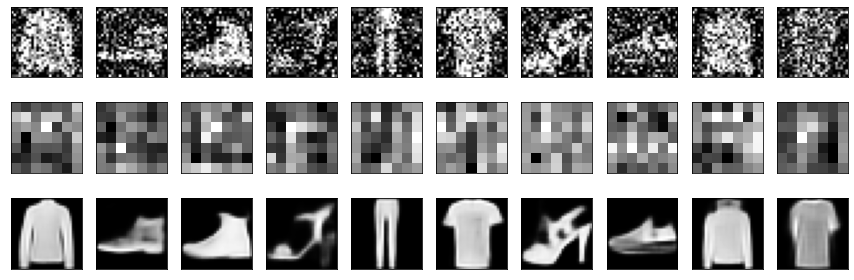

In [37]:

test_dataset = test_dataset.take(1)
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

idxs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

conv_output_samples = np.array(output_samples[idxs])
print(conv_output_samples.shape)
encoded = encoder_model1.predict(conv_output_samples)

predicted = decoder_model1.predict(conv_output_samples)

display_results(conv_output_samples, encoded, predicted, enc_shape=(7,7))